In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv('spam_or_not_spam.csv')

df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [3]:
label_counts = df['label'].value_counts()

label_counts

label
0    2500
1     500
Name: count, dtype: int64

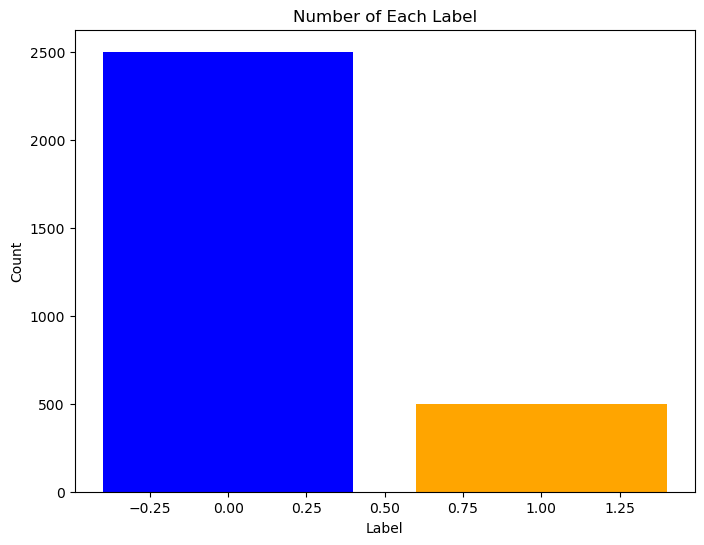

In [4]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Each Label')
plt.show()

**Droping Null**

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

email    1
label    0
dtype: int64

In [6]:
# Drop the rows with missing values
df = df.dropna()

# Print the new shape of the dataframe
print('Shape after dropping missing values:', df.shape)

Shape after dropping missing values: (2999, 2)


**Droping White Space**

In [7]:
blanks = []

for i,email,label in df.itertuples():  # iterate over the DataFrame
    if email.isspace():         # test 'email' for whitespace
        blanks.append(i)     # add matching index numbers to the list

print(len(blanks),"   |    ", 'blanks: ', blanks , )

2    |     blanks:  [2806, 2828]


In [8]:
df.iloc[blanks]

,email,label
2806,,1
2828,,1


In [9]:
df.drop(blanks, inplace=True)

df

C:\Users\Hossein\AppData\Local\Temp\ipykernel_12312\596033932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(blanks, inplace=True)


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


# Preprocessing

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [11]:
print(len(sw))

sw[0:10]

179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])
    return cleaned

In [13]:
test = "Hello World! This is a messy string, with unwanted characters and stopwords, which we'll clean using NLTK."
clean = preprocess_text(test)

clean

"Hello World! This messy string, unwanted character stopwords, we'll clean using NLTK."

In [14]:
df['email'] = df['email'].apply(preprocess_text)

df.head()

C:\Users\Hossein\AppData\Local\Temp\ipykernel_12312\1078868312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['email'] = df['email'].apply(preprocess_text)


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...,0
1,martin posted tasso papadopoulos greek sculpto...,0
2,man threatens explosion moscow thursday august...,0
3,klez virus die already prolific virus ever kle...,0
4,adding cream spaghetti carbonara effect pasta ...,0


# Conver Data to Bag of Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

X = cv.fit_transform(df['email'])
#X = TfidfVectorizer().fit_transform(df['email'])
y = df['label']

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 2997, dtype: int64

In [17]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 255298 stored elements and shape (2997, 31109)>

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       816
           1       0.99      0.95      0.97       174

    accuracy                           0.99       990
   macro avg       0.99      0.98      0.98       990
weighted avg       0.99      0.99      0.99       990



**SVM**

In [21]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.94      0.96      0.95       174

    accuracy                           0.98       990
   macro avg       0.96      0.97      0.97       990
weighted avg       0.98      0.98      0.98       990



**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.98      0.89      0.93       174

    accuracy                           0.98       990
   macro avg       0.98      0.94      0.96       990
weighted avg       0.98      0.98      0.98       990

